#### 01-08-2022

### CO2 EMISSIONS Predictions

In [7]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as metric

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
df.shape

(1067, 13)

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
statmodel =smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+\
    FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statmodel.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:54   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

In [46]:
predict = linear_reg.predict(x_test)

In [72]:
print("Coefficients: ", linear_reg.coef_)
print("Intercept: ", linear_reg.intercept_)
print("MAE: ", metric.mean_absolute_error(y_test,predict))
print("MSE: ", metric.mean_squared_error(y_test,predict))
print("RMSE: ", np.sqrt(metric.mean_squared_error(y_test,predict)))
print("R2_Score: ", metric.r2_score(y_test,predict))

accuracy = linear_reg.score(x_test,y_test)

print("Accuracy: ", accuracy*100,"%")


Coefficients:  [10.67587456  6.21246377 -4.95164102]
Intercept:  315.5201536475432
MAE:  13.64294738338035
MSE:  436.07172380840683
RMSE:  20.882330420918226
R2_Score:  0.8945399101197005
Accuracy:  89.45399101197005 %


<Axes: xlabel='CO2EMISSIONS'>

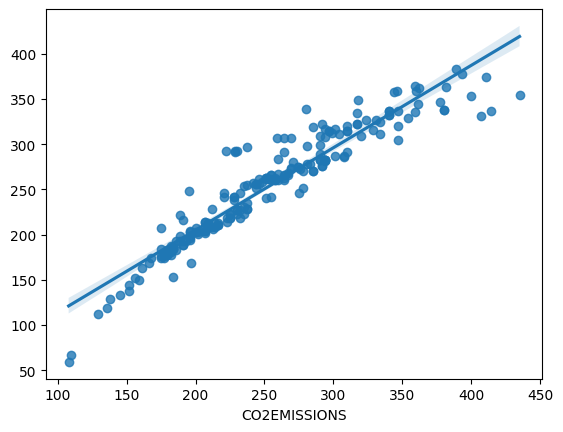

In [74]:
sns.regplot(x=y_test, y=predict)

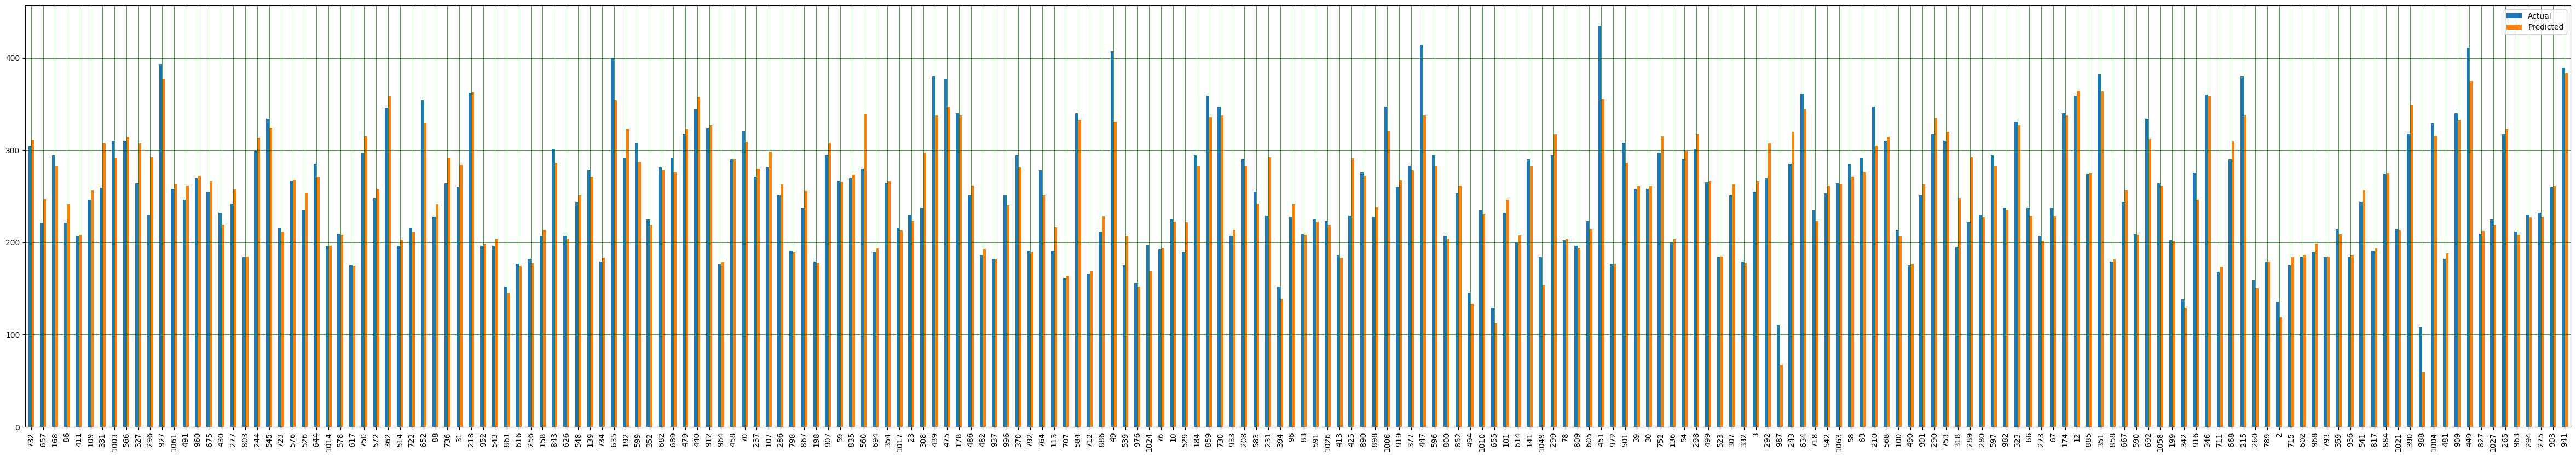

In [78]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predict})

df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [92]:
test_set = [[5, 8, 65], [2, 4, 33]]
linear_reg.predict(test_set)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 96.7425705 , 198.31760428])